# Lesson 32: Seaborn and data display

(c) 2017 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l34_seaborn.ipynb).*

In [1]:
import numpy as np
import pandas as pd

import bootcamp_utils

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

Now that we have some experience with Pandas, we can use Pandas `DataFrame`s along with Seaborn for more plotting applications. We'll start be looking at the striking forces of the frogs we studied last time.

In [19]:
# Load the data
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

## Making a bar graph with Matplotlib

Let's say we want to make a bar graph of the impact forces of the four frogs we tested. First we'll do it by selecting items from the `DataFrame` and hand-building a bar graph using Matplotlib.

If we want the mean impact force for each frog, we can select the frog and computed the mean.

In [20]:
# Mean impact force of frog I
np.mean(df.loc[df['ID']=='I', 'impact force (mN)'])

1530.2

So, let's write a **`for`** loop to compute all of these means an standard error of the mean.

In [21]:
mean_impf = np.empty(4)
sem_impf = np.empty(4)
for i, frog in enumerate(df['ID'].unique()):
    mean_impf[i] = np.mean(df.loc[df['ID']==frog, 'impact force (mN)'])
    n = np.sum(df['ID']==frog)
    sem_impf[i] = np.std(df.loc[df['ID']==frog, 'impact force (mN)']) / np.sqrt(n)
    
print(mean_impf)
print(sem_impf)

[ 1530.2    707.35   550.1    419.1 ]
[ 137.35063888   92.53359593   27.08485739   51.18749359]


We can compute the means and SEMs of all four frogs at once using the `groupby()` method of a `DataFrame`, and then using the `mean()` and `sem()` methods of the `DataFrameGroupBy` object.

In [22]:
gb_frog = df.groupby('ID')
mean_impf = gb_frog['impact force (mN)'].mean()
sem_impf = gb_frog['impact force (mN)'].sem()

print(mean_impf)
print(sem_impf)

ID
I      1530.20
II      707.35
III     550.10
IV      419.10
Name: impact force (mN), dtype: float64
ID
I      140.918782
II      94.937466
III     27.788477
IV      52.517260
Name: impact force (mN), dtype: float64


The differences in the SEMs calculated by the different methods are due to slight differences in how the standard deviations are calculated (sample vs population standard deviations).

Now that we have our mean and SEM, we can plot a bar graph using Matplotlib. We need to specify the left edges of the bars and their heights. We have to pass two kwargs, `yerr=sem_impf` to get the error bars, and `tick_label=['I', 'II', 'III', 'IV']` to specify the names of the frogs.

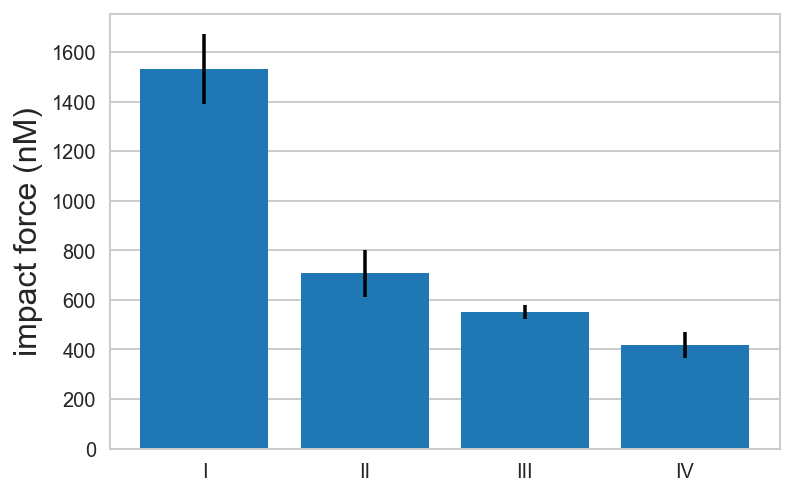

In [23]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel('impact force (nM)')

# Turn off grid lines for x-axis
ax.grid(False, axis='x')

_ = ax.bar(np.arange(4), mean_impf, yerr=sem_impf, tick_label=['I', 'II', 'III', 'IV'])

## Bar graphs with Seaborn

If you have your data in a tidy `DataFrame`, Seaborn makes a lot of this plotting *much* easier for you. Watch this one-liner (with a extra lines to get the axis labels right).

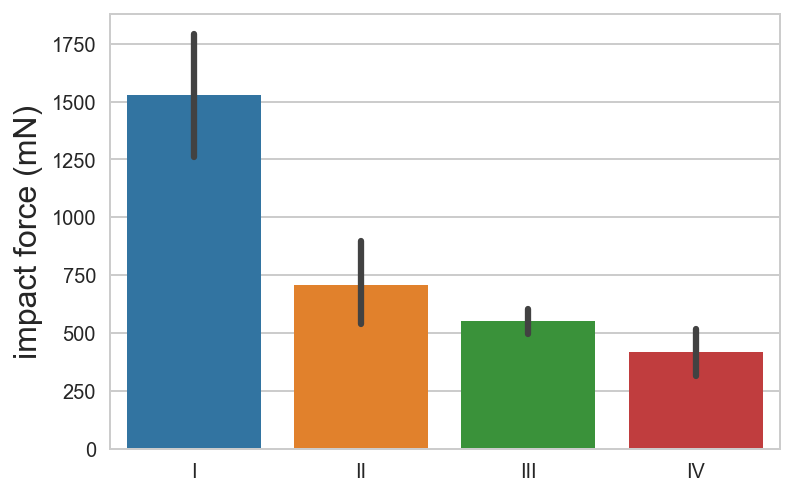

In [26]:
ax = sns.barplot(data=df, x='ID', y='impact force (mN)')
ax.set_xlabel('')
ax.set_ylabel('impact force (mN)');

Yep, those **`for`** loops (or `groupby`s) were not necessary. We just specify the `x` and `y` values and the `DataFrame` that is the source of our data, and Seaborn does the rest, provided, of course, that your `DataFrame` is tidy, even getting the grid lines right. It is a powerful package for visualization of data using Matplotlib.

## Don't make bar graphs

Bar graphs, especially with error bars, are typically awful. They are pervasive in biology papers. I have yet to find a single example where a bar graph is the best choice. Bee swarm plots or even box plots, shown below, are more informative and almost always preferred. In fact, ECDFs are often better even than these. Whether you use bee swarm plots or ECDFs, here is a simple message: 

<div class="alert alert-info">
<center>Don't make bar graphs.</center>
</div>

What should I do instead you ask? Well, read on, my loyal bootcamper!

## Bee swarm plots

When you can, plot all of your data. **Bee swarm plots** are a great way to do this. They are best seen by example. The syntax is exactly the same as for the bar graphs.

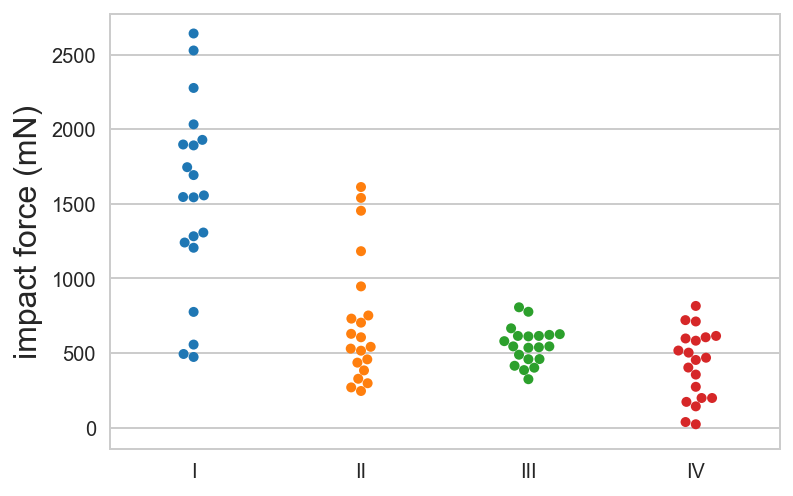

In [27]:
ax = sns.swarmplot(data=df, x='ID', y='impact force (mN)')
ax.set_xlabel('')
ax.set_ylabel('impact force (mN)');

Ah, now we see all of the data. Very useful! We can see the spread in Frog I, and we can see that Frog II is capable of hitting hard, but generally is lazy.

Now, we might be concerned that the frogs are hitting with different impact forces on different days. We can shade the days that with the `hue` kwarg. We color each point in the beeswarm plot with the date of the measurement.

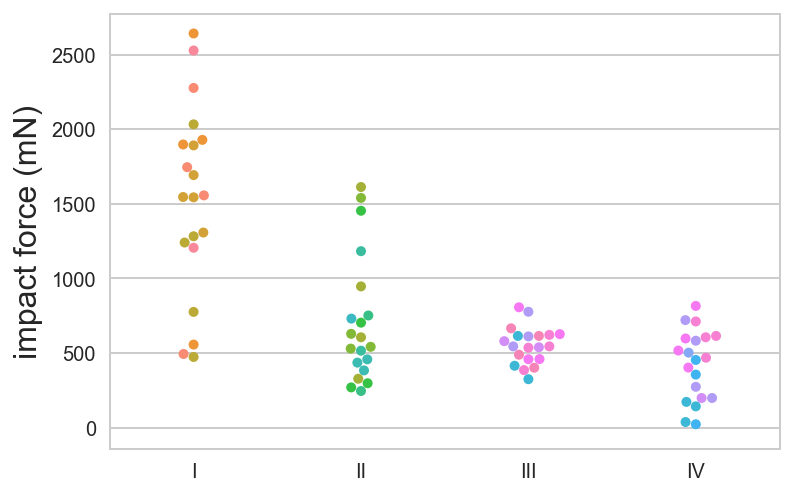

In [28]:
ax = sns.swarmplot(data=df, x='ID', y='impact force (mN)', hue='date')
ax.set_xlabel('')
ax.set_ylabel('impact force (mN)')

# Remove the legend, it is too large and cumbersome
ax.legend_.remove()

There does not seem to be any particular trend in the data depending on which day the measurements were taken. The frogs do not seem to care.

## Box plots

Sometimes we have too many points to plot a bee swarm plot. When this is the case, a **box plot** is a good alternative (though I generally prefer just plotting all of the ECDFs). That is not the case here, but we'll make a box plot anyhow to demonstrate how it works. Actually, the syntax is exactly the same as for bee swarm plots.

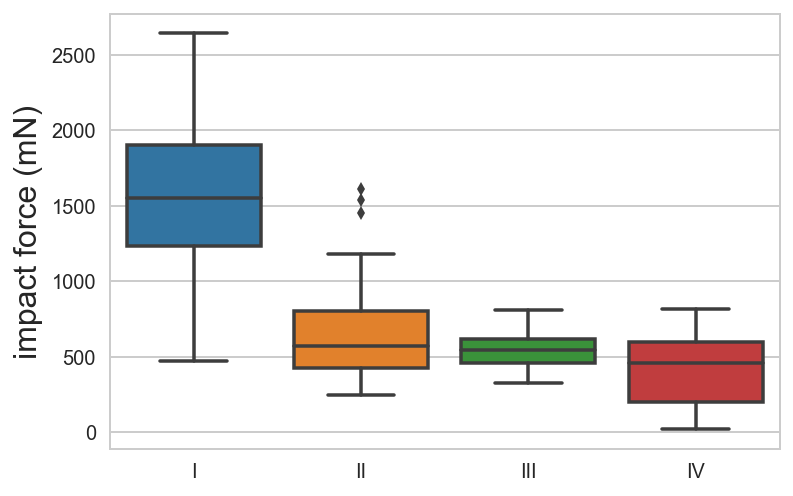

In [30]:
ax = sns.boxplot(data=df, x='ID', y='impact force (mN)')
ax.set_xlabel('')
ax.set_ylabel('impact force (mN)');

Box plots provide a summary of the data, giving substantially more information than a bar graph. The line in the middle of the box is the median and the top and bottom of the box at the 75th and 25th percentiles, respectively. The distance between the 25th and 75th percentiles is called the **interquartile range**, or IQR. The whiskers of the box plot extend a distance equal to 1.5 times the interquartile range, or to the extent of the data, whichever is least extreme. If data points are more extreme, they are shown individually, and are often referred to as outliers.

I think you now see that Seaborn enables you to make beautiful and informative graphics without too much pain. Enjoy using it in your research!

### Seaborn-like plotting of ECDFs

I actually prefer just plotting the ECDFs for each to make comparisons. Seaborn does not have a built-in function to do this, but we can write our own. We will use the ECDF plotting function we wrote in [Exercise 3.3](). I'll assume you placed it in your `bootcamp_utils` module and have it available.

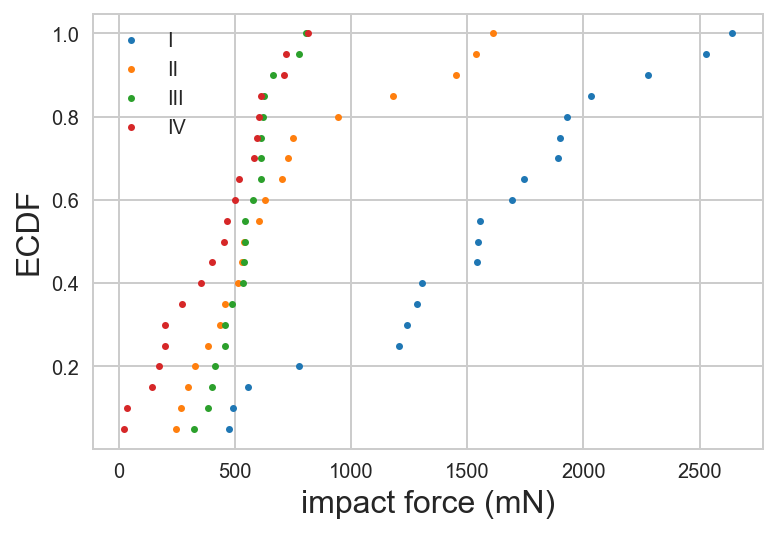

In [48]:
def ecdf_plot(df, label, value, formal=False, buff=0.1, min_x=None, max_x=None, ax=None):
    # Set up axes
    if ax is None:
        fig, ax = plt.subplots(1, 1)
        ax.set_xlabel(str(value))
        ax.set_ylabel('ECDF')

    # Group by the label
    gb = df.groupby(label)

    # Compute ECDFs
    ecdfs = gb[value].apply(bootcamp_utils.ecdf, formal=formal, buff=buff, 
                            min_x=min_x, max_x=max_x)
    
    # Make plots
    if formal:
        for i, xy in ecdfs.iteritems():
            _ = ax.plot(*xy)
    else:
        for i, xy in ecdfs.iteritems():
            _ = ax.plot(*xy, marker='.', linestyle='none')
    
    # Add legend
    ax.legend(ecdfs.index, loc=0)
    
    return ax

ax = ecdf_plot(df, 'ID', 'impact force (mN)', False)

Or, we could do it with formal ECDFs, which sometimes are easier to read when you have many data sets on the same plot.

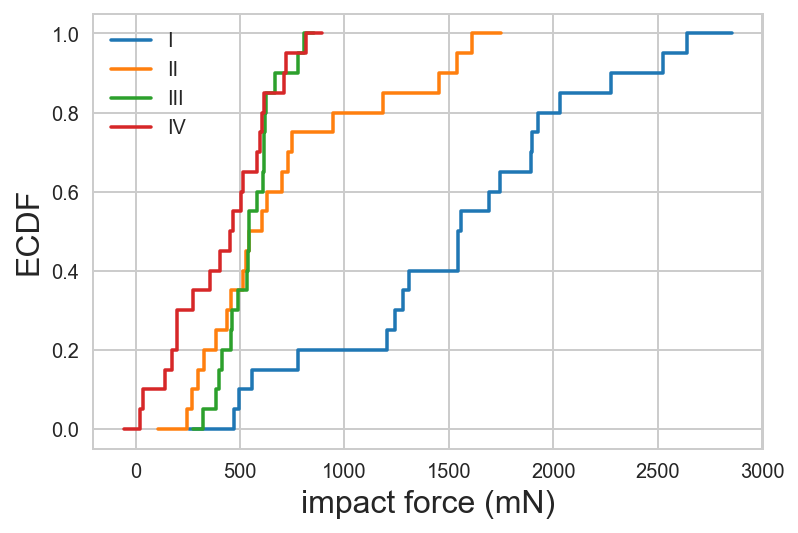

In [50]:
ax = ecdf_plot(df, 'ID', 'impact force (mN)', True)

It probably would not be a bad idea to add `ecdf_plot()` to your `bootcamp_utils`.